# Matplotlib库介绍

Matplotlib是一个用Python制作数组的2D图的库。虽然它起源于模拟MATLAB图形命令，但它独立于MATLAB，可用于Pythonic，面向对象的方式。尽管Matplotlib主要是用纯Python编写的，但是它大量使用NumPy和其他扩展代码，即使对于大型数组也能提供良好的性能。

Matplotlib的设计理念是：只需几个命令就可以创建简单的图形，或者只有一个！如果要查看数据的直方图，则不需要实例化对象，调用方法，设置属性等; 它应该只是工作。

可以用几行代码生成绘图，直方图，功率谱，条形图，错误图，散点图等。有关示例，请参阅官方文档示例图和缩略图库。


> Matplotlib历史

>Matplotlib是John D. Hunter在2008年左右的博士后研究中发明出来的，最初只是为了可视化癞痢病人的一些健康指标，慢慢的Matplotlib变成了Python上最广泛使用的可视化工具包。

>John D. Hunter本人在普林斯顿大学获得本科学位，然后2004年去了芝加哥大学拿到了博士学位，毕业后从事量化分析的工作。

>这位年轻有为的博士一生短暂，仅活了44岁，在2012年8月28日因为癌症去世了。

>matplotlib进入v2.0.0版本之后，在1.x时代一直挂在主页的文档首页的讣告(或者说是对matplotlib 创建者的缅怀)已经被去掉了： 

<img src="./figures/johnhunter.jpg" width="500" align=center>

## Matplotlib图形集

<img src="./figures/matplotlib.png" width="600" align=center>

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Matplotlib非常强大，这节简单介绍2D图表，3D图表和图像显示，说明Matplotlib的基本功能。

## 2D图表
Matplotlib中最基础的模块是pyplot。先从最简单的点图和线图开始，比如我们有一组数据，还有一个拟合模型，通过下面的代码图来可视化：

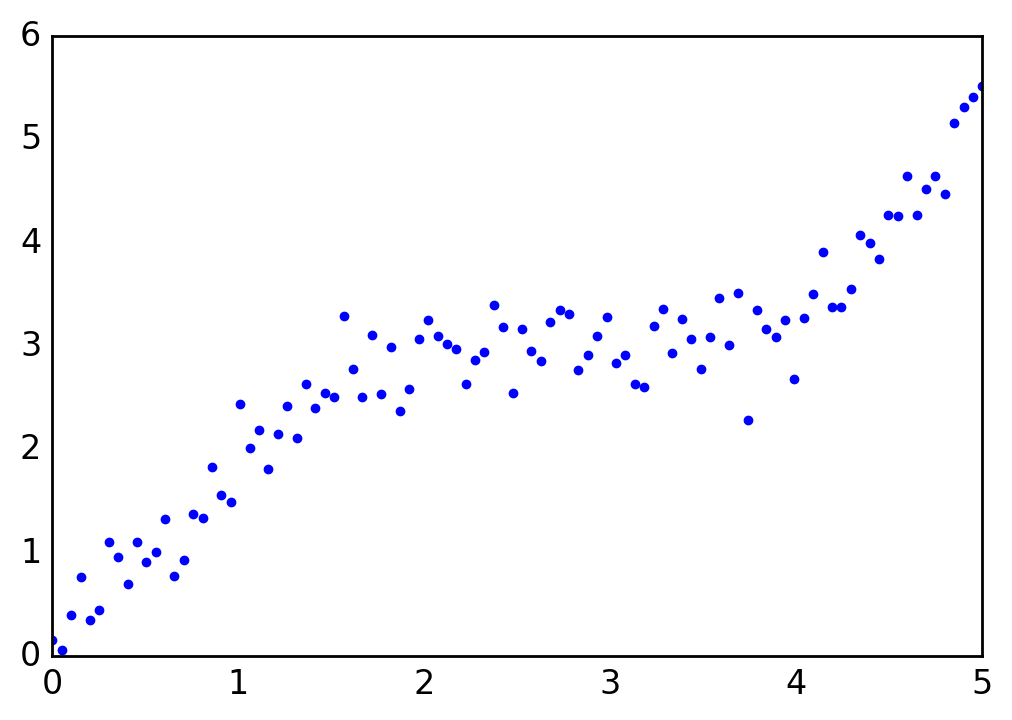

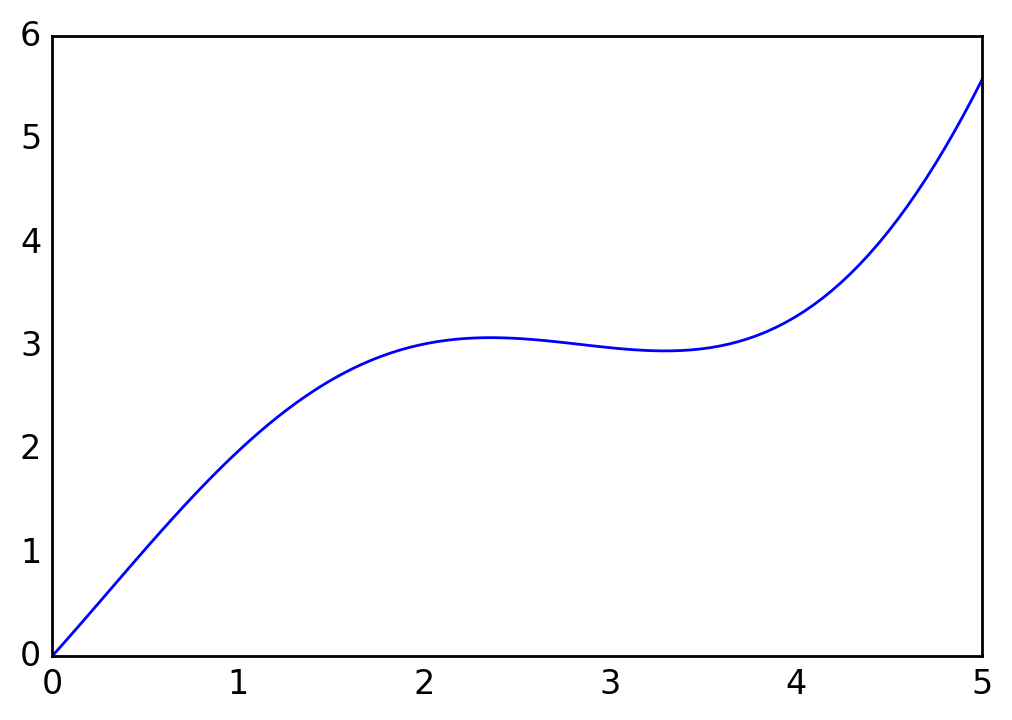

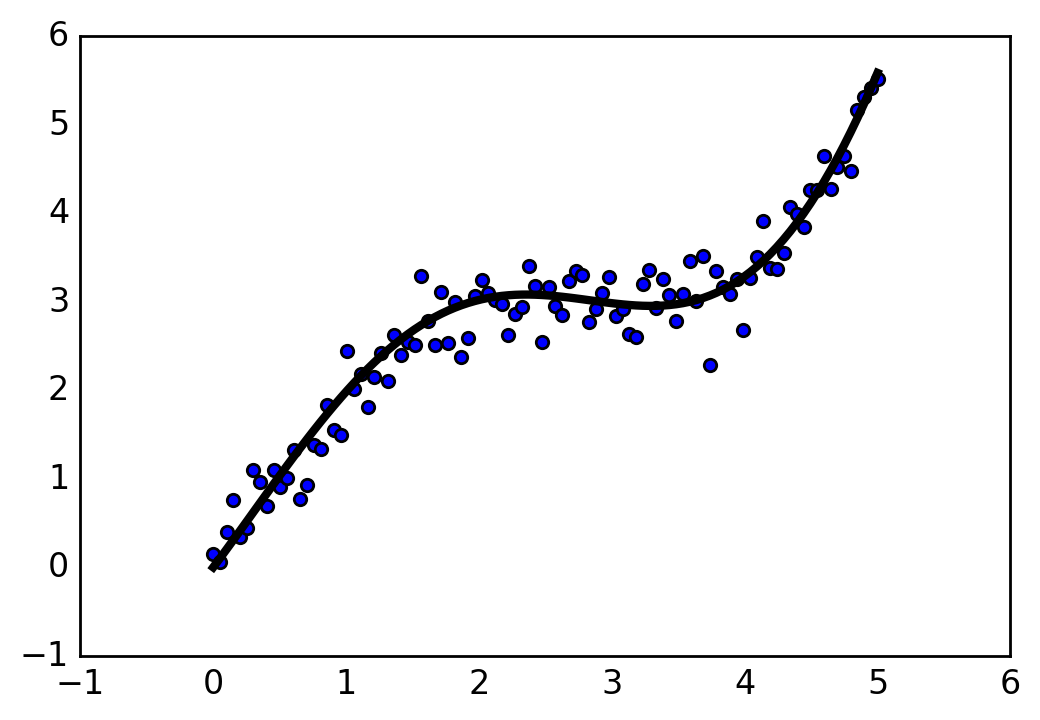

In [21]:
# 通过rcParams设置全局横纵轴字体大小
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
 
np.random.seed(42)
 
# x轴的采样点
x = np.linspace(0, 5, 100)
 
# 通过下面曲线加上噪声生成数据，所以拟合模型就用y了……
y = 2*np.sin(x) + 0.3*x**2
y_data = y + np.random.normal(scale=0.3, size=100)
 
# figure()指定图表名称
plt.figure('data')
 
# '.'标明画散点图，每个散点的形状是个圆
plt.plot(x, y_data, '.')
 
# 画模型的图，plot函数默认画连线图
plt.figure('model')
plt.plot(x, y)
 
# 两个图画一起
plt.figure('data & model')
 
# 通过'k'指定线的颜色，lw指定线的宽度
# 第三个参数除了颜色也可以指定线形，比如'r--'表示红色虚线
# 更多属性可以参考官网：http://matplotlib.org/api/pyplot_api.html
plt.plot(x, y, 'k', lw=3)
 
# scatter可以更容易地生成散点图
plt.scatter(x, y_data)
 
# 将当前figure的图保存到文件result.png
plt.savefig('result.png')
 
# 一定要加上这句才能让画好的图显示在屏幕上
plt.show()

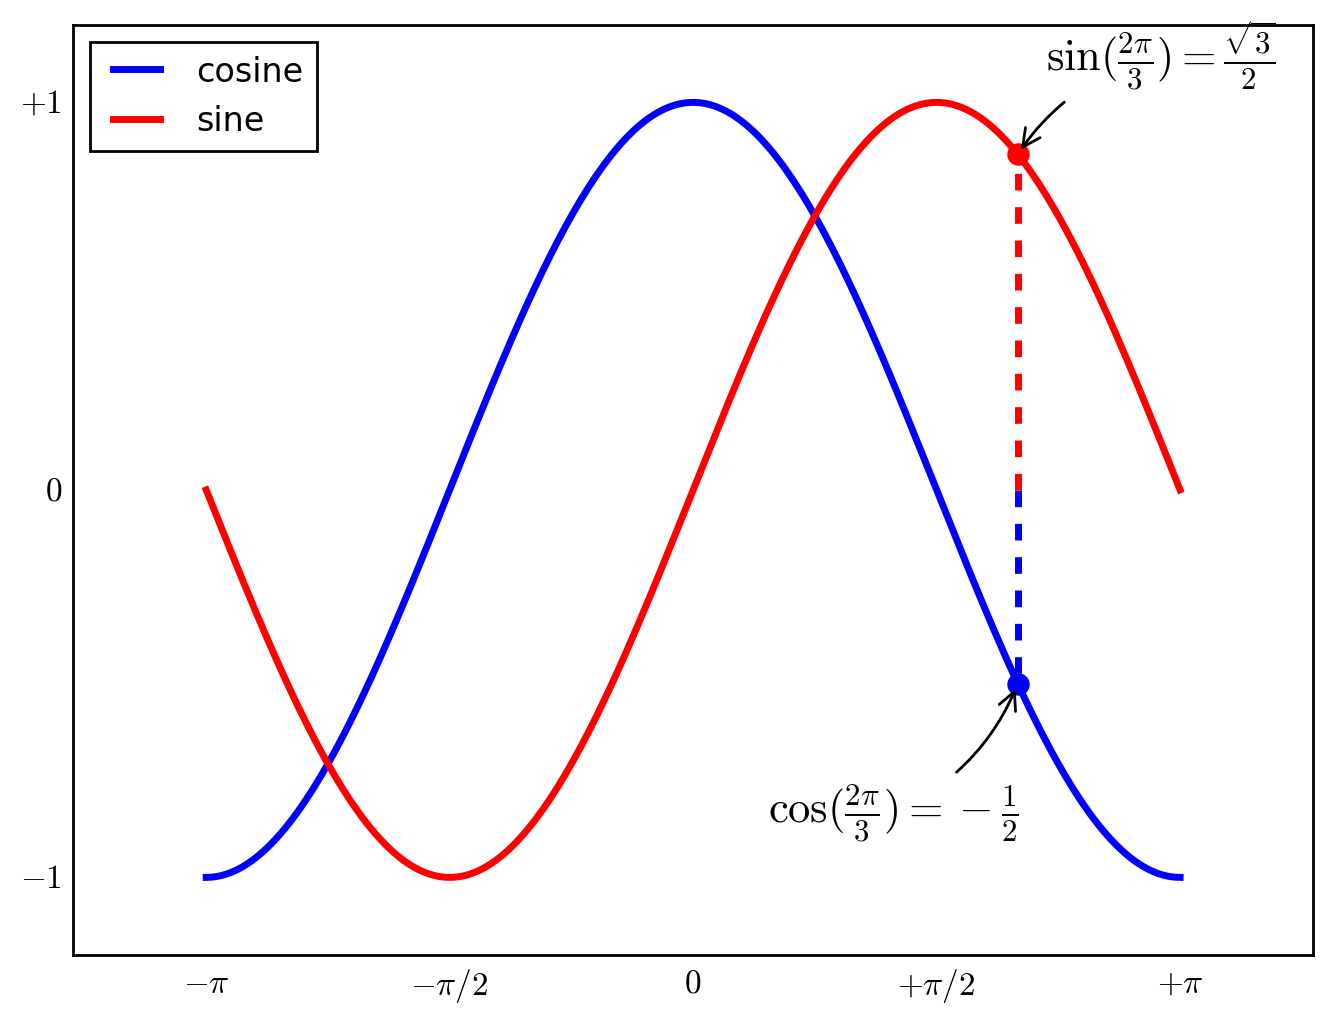

In [22]:
# 创建一个 8 * 6 点（point）的图，并设置分辨率为 80
plt.figure(figsize=(8,6), dpi=80)

# 创建一个新的 1 * 1 的子图，接下来的图样绘制在其中的第 1 块（也是唯一的一块）
plt.subplot(1,1,1)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)


plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')

plt.axis([-4,4,-1.2,1.2])
# 设置轴记号

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])


t = 2*np.pi/3
# 作一条垂直于x轴的线段，由数学知识可知，横坐标一致的两个点就在垂直于坐标轴的直线上了。这两个点是起始点。
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=2.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
         xy=(t, np.sin(t)), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# 在屏幕上显示
plt.show()

点和线图表只是最基本的用法，有的时候我们获取了分组数据要做对比，柱状或饼状类型的图或许更合适：

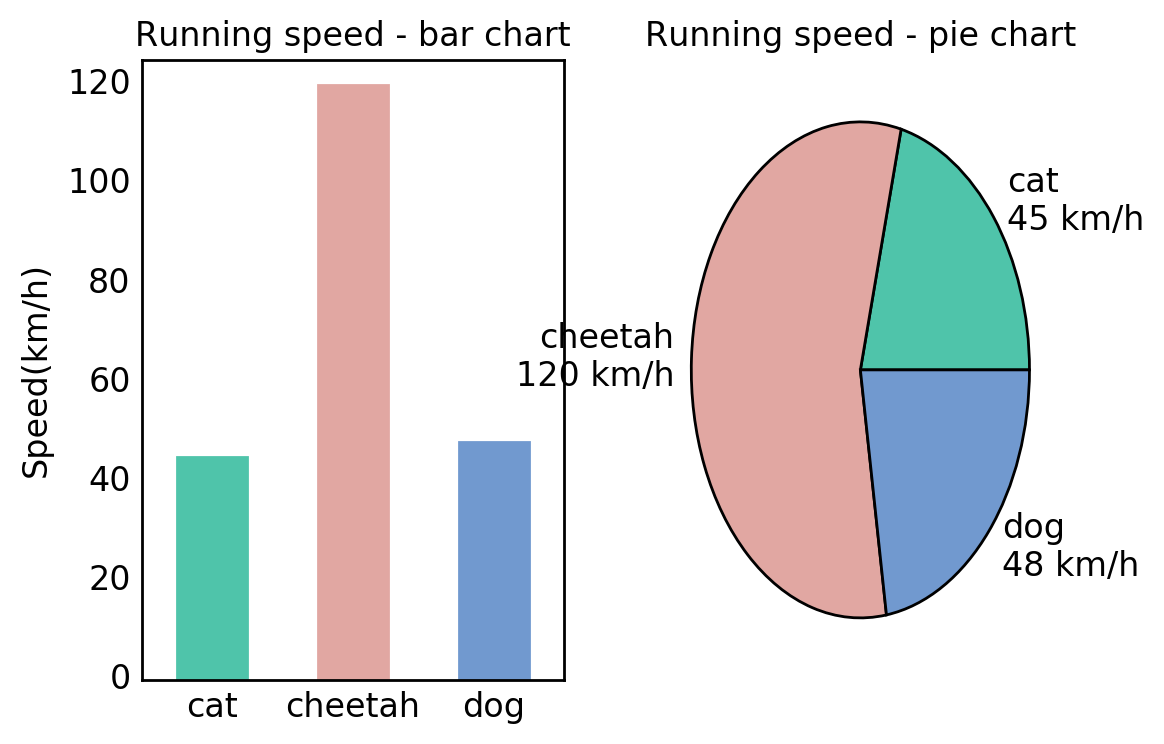

In [23]:
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
 
# 包含了狗，猫和猎豹的最高奔跑速度，还有对应的可视化颜色
speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}
 
# 整体图的标题
fig = plt.figure('Bar chart & Pie chart')
 
# 在整张图上加入一个子图，121的意思是在一个1行2列的子图中的第一张
ax = fig.add_subplot(121)
ax.set_title('Running speed - bar chart')
 
# 生成x轴每个元素的位置
xticks = np.arange(3)
 
# 定义柱状图每个柱的宽度
bar_width = 0.5
 
# 动物名称
animals = speed_map.keys()
 
# 奔跑速度
speeds = [x[0] for x in speed_map.values()]
 
# 对应颜色
colors = [x[1] for x in speed_map.values()]
 
# 画柱状图，横轴是动物标签的位置，纵轴是速度，定义柱的宽度，同时设置柱的边缘为透明
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none')
 
# 设置y轴的标题
ax.set_ylabel('Speed(km/h)')
 
# x轴每个标签的具体位置，设置为每个柱的中央
ax.set_xticks(xticks+bar_width/2)
 
# 设置每个标签的名字
ax.set_xticklabels(animals)
 
# 设置x轴的范围
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])
 
# 设置y轴的范围
ax.set_ylim([0, 125])
 
# 给每个bar分配指定的颜色
for bar, color in zip(bars, colors):
    bar.set_color(color)
 
# 在122位置加入新的图
ax = fig.add_subplot(122)
ax.set_title('Running speed - pie chart')
 
# 生成同时包含名称和速度的标签
labels = ['{}\n{} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]
 
# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)
 
plt.show()

在Matplotlib中，画图时有两个常用概念，一个是平时画图蹦出的一个窗口，这叫一个figure。Figure相当于一个大的画布，在每个figure中，又可以存在多个子图，这种子图叫做axes。顾名思义，有了横纵轴就是一幅简单的图表。在上面代码中，先把figure定义成了一个一行两列的大画布，然后通过fig.add_subplot()加入两个新的子图。subplot的定义格式很有趣，数字的前两位分别定义行数和列数，最后一位定义新加入子图的所处顺序，当然想写明确些也没问题，用逗号分开即可。

## 3D图表
Matplotlib中也能支持一些基础的3D图表，比如曲面图，散点图和柱状图。这些3D图表需要使用mpl_toolkits模块，先来看一个简单的曲面图的例子：

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


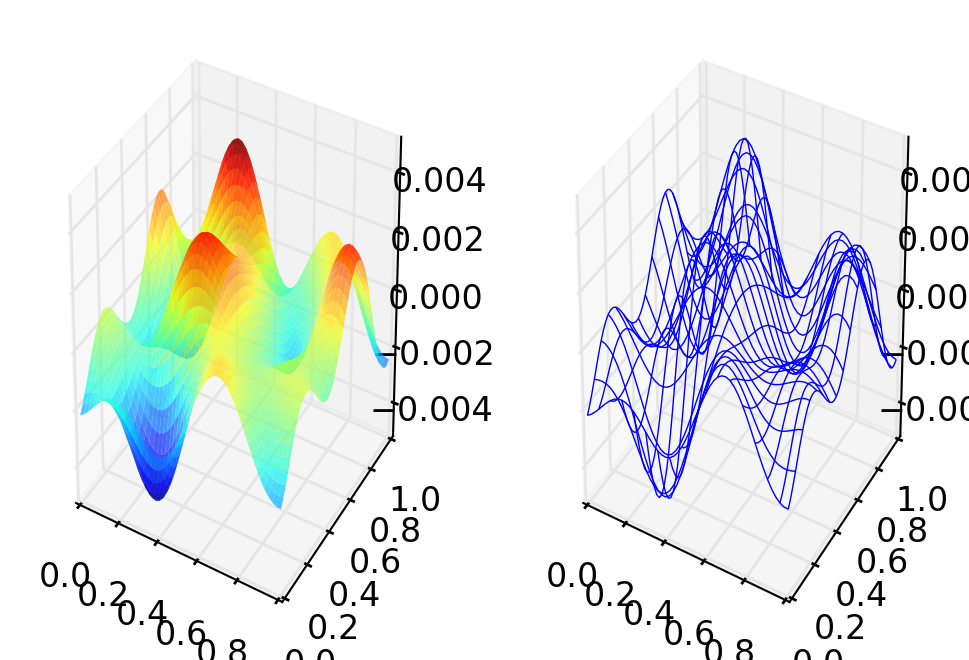

In [24]:
# 3D图标必须的模块，project='3d'的定义
from mpl_toolkits.mplot3d import Axes3D     
 
np.random.seed(42)
 
n_grids = 51        	# x-y平面的格点数 
c = n_grids / 2     	# 中心位置
nf = 2              	# 低频成分的个数
 
# 生成格点
x = np.linspace(0, 1, n_grids)
y = np.linspace(0, 1, n_grids)
 
# x和y是长度为n_grids的array
# meshgrid会把x和y组合成n_grids*n_grids的array，X和Y对应位置就是所有格点的坐标
X, Y = np.meshgrid(x, y)
 
# 生成一个0值的傅里叶谱
spectrum = np.zeros((n_grids, n_grids), dtype=np.complex)
 
# 生成一段噪音，长度是(2*nf+1)**2/2
noise = [np.complex(x, y) for x, y in np.random.uniform(-1,1,((2*nf+1)**2/2, 2))]
 
# 傅里叶频谱的每一项和其共轭关于中心对称
noisy_block = np.concatenate((noise, [0j], np.conjugate(noise[::-1])))
 
# 将生成的频谱作为低频成分
spectrum[c-nf:c+nf+1, c-nf:c+nf+1] = noisy_block.reshape((2*nf+1, 2*nf+1))
 
# 进行反傅里叶变换
Z = np.real(np.fft.ifft2(np.fft.ifftshift(spectrum)))
 
# 创建图表
fig = plt.figure('3D surface & wire')
 
# 第一个子图，surface图
ax = fig.add_subplot(1, 2, 1, projection='3d')
 
# alpha定义透明度，cmap是color map
# rstride和cstride是两个方向上的采样，越小越精细，lw是线宽
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='jet', rstride=1, cstride=1, lw=0)
 
# 第二个子图，网线图
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, lw=0.5)
 
plt.show()

这个例子中先生成一个所有值均为0的复数array作为初始频谱，然后把频谱中央部分用随机生成，但同时共轭关于中心对称的子矩阵进行填充。这相当于只有低频成分的一个随机频谱。最后进行反傅里叶变换就得到一个随机波动的曲面。

3D的散点图也是常常用来查看空间样本分布的一种手段，并且画起来比表面图和网线图更加简单，来看下面的例子。这个例子中，为了方便，直接先采样了一堆3维的正态分布样本，保证方向上的均匀性。然后归一化，让每个样本到原点的距离为1，相当于得到了一个均匀分布在球面上的样本。再接着把每个样本都乘上一个均匀分布随机数的开3次方，这样就得到了在球体内均匀分布的样本，最后根据判别平面3x+2y-z-1=0对平面两侧样本用不同的形状和颜色画出，图像如下：

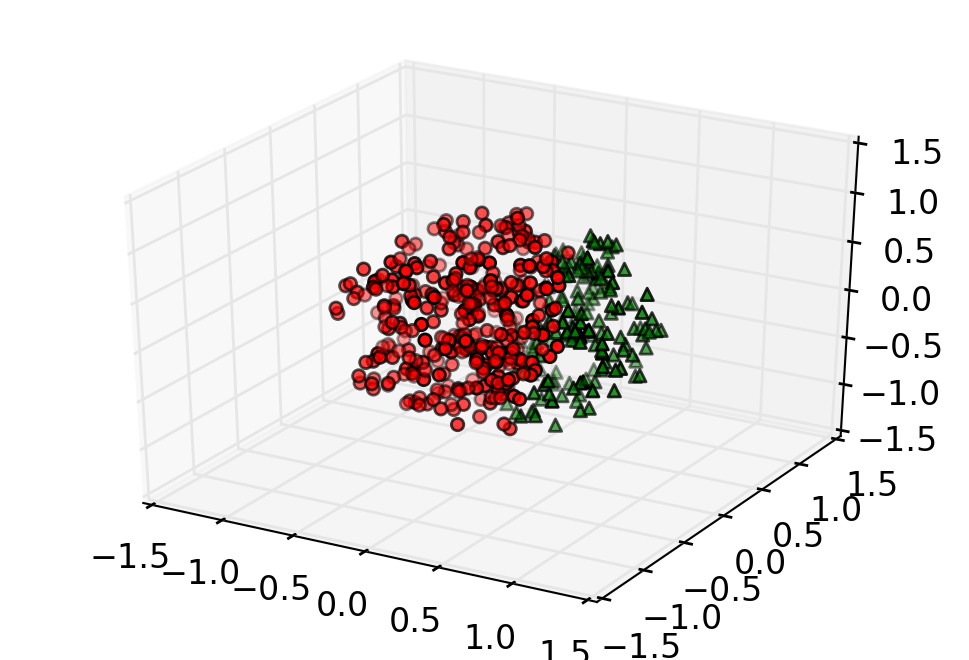

In [25]:
from mpl_toolkits.mplot3d import Axes3D
 
np.random.seed(42)
 
# 采样个数500
n_samples = 500
dim = 3
 
# 先生成一组3维正态分布数据，数据方向完全随机
samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)
 
# 通过把每个样本到原点距离和均匀分布吻合得到球体内均匀分布的样本
for i in range(samples.shape[0]):
    r = np.power(np.random.random(), 1.0/3.0)
    samples[i] *= r / np.linalg.norm(samples[i])
 
upper_samples = []
lower_samples = []
 
for x, y, z in samples:
    # 3x+2y-z=1作为判别平面
    if z > 3*x + 2*y - 1:
        upper_samples.append((x, y, z))
    else:
        lower_samples.append((x, y, z))
 
fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')
 
uppers = np.array(upper_samples)
lowers = np.array(lower_samples)
 
# 用不同颜色不同形状的图标表示平面上下的样本
# 判别平面上半部分为红色圆点，下半部分为绿色三角
ax.scatter(uppers[:, 0], uppers[:, 1], uppers[:, 2], c='r', marker='o')
ax.scatter(lowers[:, 0], lowers[:, 1], lowers[:, 2], c='g', marker='^')
 
plt.show()

## Matplotlib函数表
<img src="./figures/Matplotlib Cheat Sheet.png" width="800" align=center>